# Random walk
> BingKan Xue, PHZ4710 - Introduction to Biological Physics, University of Florida

Let us simulate a random walk in 1D. Consider a particle that starts at the origin, $x=0$. At every time step $\Delta t$, the particle will randomly choose to move left or right, for a fixed distance $\Delta x$. After many times steps, the particle will end up at a position $x$, which depends on the particular trajectory that it took. If we run the simulation again, there will be a different realization of the random trajectory, hence the particle may end up at a different position. Therefore, the position $x(t)$ of the particle at a given time $t$ is a random variable itself.

We will be interested in finding the distribution of the random variable $x(t)$ for a given time $t$, and will also study how this distribution changes with time. To do that, we will have to simulate many particles, or equivalently repeat the simulation many times. It would be easier if we define the simulation as a Python *class*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RandomWalk1D():
    """
    simulate random walk of a particle in 1D.
    """
    
    def __init__(self, dt=1., speed=1.):
        """
        initialize the simulation by setting the initial position of the particle.
        inputs:
        dt: float, time step size.
        speed: float, each time step the particle moves a distance dx=dt*speed.
        """
        self.dt = dt
        self.dx = dt * speed
        self.t = 0.    # current time since the beginning of the simulation
        self.x = 0.    # current position of the particle
    
    def run(self, T):
        """
        run the simulation until time T (total time since the very beginning). By defining the argument `T` this way,
        we can pick up the simulation where we left last time and continue to run it further. 
        inputs:
        T: int, total amount of time since the beginning of simulation.
        """
        n = int((T - self.t) / self.dt)    # number of time steps needed to simulate
        for t in range(n):
            direction = np.random.rand()    # draw a random number uniformly from between 0 and 1
            if direction < 0.5:    # move left
                self.x = self.x - self.dx
            else:    # move right
                self.x = self.x + self.dx
            self.t = self.t + self.dt    # keep track of time since the beginning of the simulation

Let us test this class by creating an "instance" of the class and run it.

In [3]:
rw1 = RandomWalk1D()
rw1.run(1000)
print(f'current position = {rw1.x}')

current position = 4.0


Now we can run many simulations by creating many instances of the class, and collecting their results.

In [4]:
N = 10000    # number of simulations to run
T = 1000     # amount of time to run
results = []    # collect results from every simulation
for n in range(N):
    rw1 = RandomWalk1D()
    rw1.run(T)
    results.append(rw1.x)

To visualize those results, we can plot a histogram, which is a way to estimate the probability distribution.

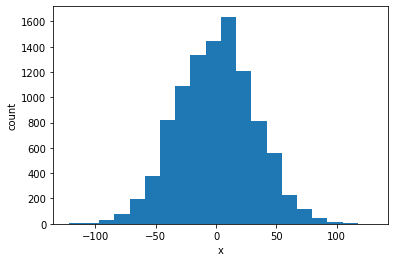

In [5]:
nbins = 20    # number of bins to use
plt.figure()
plt.hist(results, bins=nbins)
plt.xlabel('x')
plt.ylabel('count')
plt.show()

The histogram looks like a bell-shaped curve, such as a Gaussian function. In fact, we can mathematically prove that the distribution is expected to be Gaussian. Let us draw a Gaussian curve on top of the histogram to see the match. First, we need to calculate the mean and variance of the data, to be used to draw the Gaussian distribution. Also, it is a good idea to normalize the histogram.

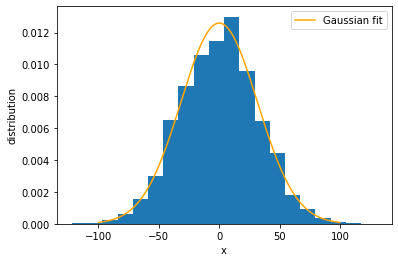

In [6]:
xmean = np.mean(results)    # calculate the mean of data
xvar = np.var(results)    # calculate the variance of data
x_array = np.linspace(xmean-100, xmean+100, 201)    # choose sample points to draw the curve
g_array = 1./np.sqrt(2*np.pi*xvar) * np.exp(-0.5*(x_array-xmean)**2/xvar) # calculate Gaussian curve

plt.figure()
plt.hist(results, bins=nbins, density=True)    # the `density` parameter normalizes the distribution
plt.plot(x_array, g_array, color='orange', label='Gaussian fit')
plt.xlabel('x')
plt.ylabel('distribution')
plt.legend()
plt.show()

Now we would like to see how the distribution changes over time. It turns out that the distribution remains Gaussian for all time $t$, as we just saw for $t=1000$. Therefore, all we need to know is how the mean and variance change over time. To find that, we will have to run the simulation for different periods of time. Here we see the advantage of using class objects for the simulations --- we can save them for later (which we did not do above!) and resume from where we left them.

In [7]:
rw1_list = [RandomWalk1D() for n in range(N)]    # create and save N instances of the class
T_list = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]    # time points at which we check the distribution
xmean_list = [0]    # list to collect the mean of the distribution at each time point above; first value is 0 at T=0
xvar_list = [0]    # list to collect the variance of the distribution at each time point above; first value is 0 at T=0

for T in T_list[1:]:    # skip the first time point T=0
    results = []    # collect results from every simulation
    for rw1 in rw1_list:
        rw1.run(T)    # run each simulation until time T
        results.append(rw1.x)
    xmean = np.mean(results)    # calculate the mean at each time point
    xvar = np.var(results)    # calculate the variance at each time point
    xmean_list.append(xmean)
    xvar_list.append(xvar)

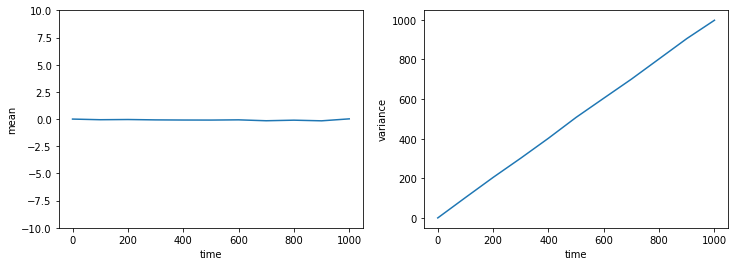

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,4))    # make 2 subplots
ax[0].plot(T_list, xmean_list)    # ax[0] is the first subplot
ax[0].set_ylim(-10, 10)    # note the convention: ax.set_ylim() vs plt.ylim(); similarly below
ax[0].set_xlabel('time')
ax[0].set_ylabel('mean')
ax[1].plot(T_list, xvar_list)    # ax[1] is the second subplot
ax[1].set_xlabel('time')
ax[1].set_ylabel('variance')
plt.show()

We see that the mean of the distribution basically remains 0, whereas the variance increases linearly with time. The latter is a characteristic feature of diffusion. The slope of the variance versus time is twice the "diffusion coefficient". In our case, we can read off from the plot that the diffusion coefficient is $D = 0.5$.

To better visualize the temporal changes of the distribution, we may plot the Gaussian distributions at every time point.

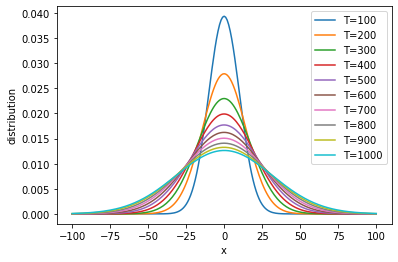

In [9]:
plt.figure()
for i in range(1,len(T_list)):    # skip the first time point T=0
    xmean = xmean_list[i]    # get the mean of distribution at given time point
    xvar = xvar_list[i]    # get the variance of distribution at given time point
    x_array = np.linspace(xmean-100, xmean+100, 201)    # choose sample points to draw the curve
    g_array = 1./np.sqrt(2*np.pi*xvar) * np.exp(-0.5*(x_array-xmean)**2/xvar) # calculate Gaussian curve
    plt.plot(x_array, g_array, label=f'T={T_list[i]}')    # label curves by time point
plt.xlabel('x')
plt.ylabel('distribution')
plt.legend()
plt.show()

We see that the distribution is always centered at zero, but the width increases over time. This means that, early on, the particle is typically found in a small region around the origin; but as time goes by, the particle will "diffuse" over a larger region.

If we accept that the distribution is Gaussian, with zero mean and a variance that increases linearly with time like $\sigma^2 = 2Dt$ (which can be proved mathematically), then we can write down the distribution function as:
\begin{equation}
P(x,t) = \frac{1}{\sqrt{4\pi Dt}} \, \mathrm{e}^{-\frac{x^2}{4Dt}}
\end{equation}
One may check that it is a solution to the diffusion equation:
\begin{equation}
\frac{\partial}{\partial t} P(x,t) = D \frac{\partial^2}{\partial x^2} P(x,t)
\end{equation}
This solution describes diffusion of particles that all start from the origin.

## Adding bias (drift)

So far we have assumed that the random walk is unbiased, i.e., there is equal probability of going left or right at each step. Let us now introduce a bias by specifying an unequal probability of going left or right. Let the probability of going left be $p$, then that of going right will be $1-p$. We can modify the Python class as follows.

In [10]:
class BiasedRandomWalk1D():
    """
    simulate biased random walk of a particle in 1D.
    """
    
    def __init__(self, dt=1., speed=1., prob=0.5):    # notice new keyword `prob`
        """
        initialize the simulation by setting the initial position of the particle.
        inputs:
        dt: float, time step size.
        speed: float, each time step the particle moves a distance dx=dt*speed.
        prob: float, probability of going left, should be between 0 and 1.
        """
        self.dt = dt
        self.dx = dt * speed
        self.p = prob
        self.t = 0.    # current time since the beginning of the simulation
        self.x = 0.    # current position of the particle
    
    def run(self, T):
        """
        run the simulation until time T (total time since the very beginning). By defining the argument `T` this way,
        we can pick up the simulation where we left last time and continue to run it further. 
        inputs:
        T: int, total amount of time since the beginning of simulation.
        """
        n = int((T - self.t) / self.dt)    # number of time steps needed to simulate
        for t in range(n):
            direction = np.random.rand()    # draw a random number uniformly from between 0 and 1
            if direction < self.p:    # move left with probability p
                self.x = self.x - self.dx
            else:    # move right with probability 1-p
                self.x = self.x + self.dx
            self.t = self.t + self.dt    # keep track of time since the beginning of the simulation

Let us see how the mean and variance change with time for a biased random walk.

In [11]:
p = 0.3

brw1_list = [BiasedRandomWalk1D(prob=p) for n in range(N)]    # create and save N instances of the class
T_list = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]    # time points at which we check the distribution
bxmean_list = [0]    # list to collect the mean of the distribution at each time point above; first value is 0 at T=0
bxvar_list = [0]    # list to collect the variance of the distribution at each time point above; first value is 0 at T=0

for T in T_list[1:]:    # skip the first time point T=0
    results = []    # collect results from every simulation
    for brw1 in brw1_list:
        brw1.run(T)    # run each simulation until time T
        results.append(brw1.x)
    xmean = np.mean(results)    # calculate the mean at each time point
    xvar = np.var(results)    # calculate the variance at each time point
    bxmean_list.append(xmean)
    bxvar_list.append(xvar)

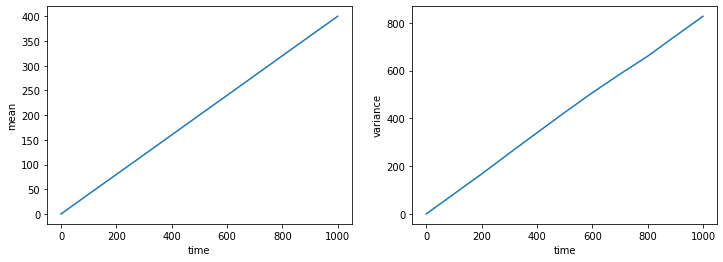

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,4))    # make 2 subplots
ax[0].plot(T_list, bxmean_list)    # ax[0] is the first subplot
ax[0].set_xlabel('time')
ax[0].set_ylabel('mean')
ax[1].plot(T_list, bxvar_list)    # ax[1] is the second subplot
ax[1].set_xlabel('time')
ax[1].set_ylabel('variance')
plt.show()

We see that now the mean also increases linearly with time, meaning that the particles are "drifting" to the right. Notice that the slope of the variance has changed compared to the unbiased case above.

**Exercise:** Can you mathematically derive the expected values of the slopes of both mean and variance?

Let us plot the temporal changes of the distribution in this case.

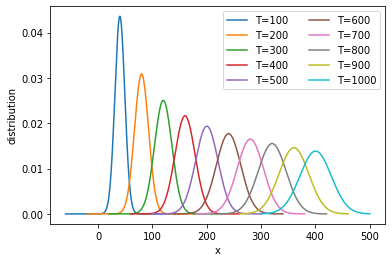

In [13]:
plt.figure()
for i in range(1,len(T_list)):    # skip the first time point T=0
    xmean = bxmean_list[i]    # get the mean of distribution at given time point
    xvar = bxvar_list[i]    # get the variance of distribution at given time point
    x_array = np.linspace(xmean-100, xmean+100, 201)    # choose sample points to draw the curve
    g_array = 1./np.sqrt(2*np.pi*xvar) * np.exp(-0.5*(x_array-xmean)**2/xvar) # calculate Gaussian curve
    plt.plot(x_array, g_array, label=f'T={T_list[i]}')    # label curves by time point
plt.xlabel('x')
plt.ylabel('distribution')
plt.legend(ncol=2)
plt.show()

It is clear that the distribution is moving to the right while becoming wider. If we denote the drift velocity by $v$ so that the mean position changes as $\mu = v t$, and the variance changes as $\sigma^2 = 2Dt$ as before, then the Gaussian distribution can be written as:
\begin{equation}
P(x,t) = \frac{1}{\sqrt{4\pi Dt}} \, \mathrm{e}^{-\frac{(x-vt)^2}{4Dt}}
\end{equation}
This is a solution to the drift-diffusion equation:
\begin{equation}
\frac{\partial}{\partial t} P(x,t) = D \frac{\partial^2}{\partial x^2} P(x,t) - v \frac{\partial}{\partial x} P(x,t)
\end{equation}
as one may check by inserting the solution into the equation.